### Part-A  
**(Chernoff Bound) [15 Marks]**  

Suppose $( X_1, X_2, \dots, X_n )$ are i.i.d. copies of a $ \mathcal{N}(0, \sigma^2)$ random variable. Then, for $ X = \frac{1}{n} \sum_{i=1}^n X_i $, we know that:

$$
\mathbb{P}[X \geq \varepsilon] \leq \exp\left( \frac{-n \varepsilon^2}{2 \sigma^2} \right).
$$

$$
\mathbb{P}[|X| \geq \varepsilon] \leq 2\exp\left( \frac{-n \varepsilon^2}{2 \sigma^2} \right).
$$

Write a Python code to run Monte Carlo simulations that verify the inequality. Specifically, for a given $\varepsilon$ and $\sigma$, generate $n$ samples from the zero-mean Gaussian distribution $( x_1, x_2, \dots, x_n )$ and check whether the sample average is more than $\varepsilon$. Repeat this experiment 500 times and observe in how many experiments out of those 500 experiments the sample average is more than $\varepsilon$. This will give us an empirical estimate of $\mathbb{P}[|X| \geq \varepsilon]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

The function $\texttt{monte_carlo_chernoff}$ computes the empirical probability and the Chernoff bound for the event $X \geq \varepsilon$, where $X = \frac{1}{n} \sum_{i=1}^n X_i$ and $X_i \sim \mathcal{N}(0, \sigma^2)$. For each $n$ in $\texttt{n_values}$, it generates $n$ samples from $\mathcal{N}(0, \sigma^2)$ , computes the sample mean, and checks if it exceeds $\varepsilon$. This is repeated $\texttt{num_experiments}$ times to estimate the empirical probability. The Chernoff bound is computed as:
$$
\text{Chernoff Bound} = 2\exp\left( \frac{-n \varepsilon^2}{2 \sigma^2} \right).
$$

The function returns the empirical probability and the Chernoff bound for each $n$.

In [14]:
def monte_carlo_chernoff(sigma, epsilon, n_values, num_experiments):
    empirical_prob = []
    chernoff_bound = []

    for n in n_values:
        count = 0
        for _ in range(num_experiments):
            # Generate n samples from N(0, sigma^2)
            samples = np.random.normal(0, sigma, n)
            sample_mean = np.mean(samples)
            if np.absolute(sample_mean) >= epsilon:
                count += 1

        # Empirical probability
        empirical_prob.append(count / num_experiments)

        # Chernoff bound
        chernoff_bound.append(2 * np.exp(-n * epsilon**2 / (2 * sigma**2)))

    return empirical_prob, chernoff_bound

###1.
Take 𝜎 = 1, 𝜀 = 0.1, and plot the empirical estimate as a function of 𝑛 ∈ {50, 100, 150, ..., 2000}.. In
the same plot, include the Chernoff upper bound as a function of 𝑛.


In [15]:
# Parameters
sigma = 1
epsilon = 0.1
n_values = np.arange(50, 2001, 50)  # n ∈ {50, 100, 150, ..., 2000}
num_experiments = 500  # Number of Monte Carlo experiments

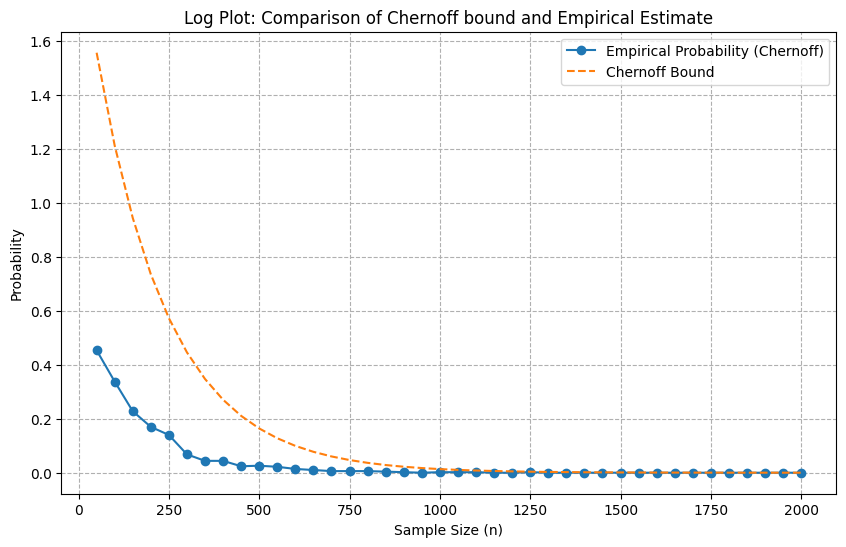

In [16]:
# Monte Carlo simulations for Chernoff bound
empirical_chernoff, chernoff_bound = monte_carlo_chernoff(sigma, epsilon, n_values, num_experiments)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, empirical_chernoff, label='Empirical Probability (Chernoff)', marker='o')
plt.plot(n_values, chernoff_bound, label='Chernoff Bound', linestyle='--')
plt.xlabel('Sample Size (n)')
plt.ylabel('Probability')
plt.title('Log Plot: Comparison of Chernoff bound and Empirical Estimate')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

As we can see from the plot the Empirical Probability follows the required inequality mentioned by Chernoff Bound.
$$
\mathbb{P}[|X| \geq \varepsilon] (Empirical Probablity) \leq 2\exp\left( \frac{-n \varepsilon^2}{2 \sigma^2} \right).
$$

###2.
Repeat the experiment with the Chebyshev inequality bound and compare it with the
Chernoff bound.

  **(Chebyshev Bound)**  

Suppose $( X_1, X_2, \dots, X_n )$ are i.i.d. copies of a $ \mathcal{N}(0, \sigma^2)$ random variable. Then, for $ X = \frac{1}{n} \sum_{i=1}^n X_i $, we know that:

$$
\mathbb{P}[|X - E[X_i] | \geq \varepsilon] \leq \left( \frac{ Var[X_i]}{n \varepsilon^2} \right).
$$

$$
\mathbb{P}[|X| \geq \varepsilon] \leq \left( \frac{σ^2}{n \varepsilon^2} \right).
$$


In [17]:
def monte_carlo_joint(sigma, epsilon, n_values, num_experiments):
    empirical_prob = []
    chernoff_bound = []
    chebyshev_bound = []

    for n in n_values:
        count = 0
        for _ in range(num_experiments):
            # Generate n samples from N(0, sigma^2)
            samples = np.random.normal(0, sigma, n)
            sample_mean = np.mean(samples)
            if np.absolute(sample_mean) >= epsilon:
                count += 1

        # Empirical probability
        empirical_prob.append(count / num_experiments)

        chernoff_bound.append(2 * np.exp(-n * epsilon**2 / (2 * sigma**2)))
        chebyshev_bound.append(sigma**2 / (n * epsilon**2))

    return empirical_prob, chernoff_bound, chebyshev_bound

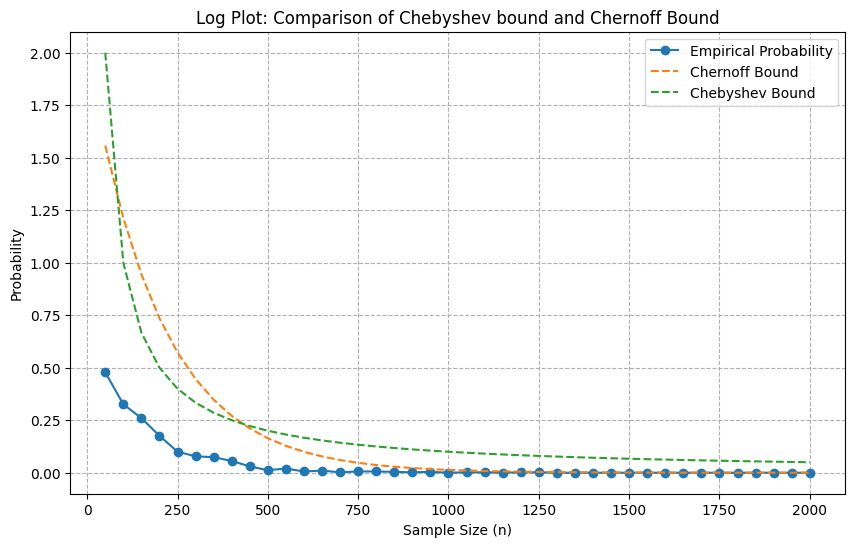

In [18]:
# Monte Carlo simulations for Chebyshev and Chernoff Bound
empirical, chernoff_bound, chebyshev_bound = monte_carlo_joint(sigma, epsilon, n_values, num_experiments)

# Plot
plt.figure(figsize=(10, 6))
# plt.yscale("log")
plt.plot(n_values, empirical, label='Empirical Probability', marker='o')
plt.plot(n_values, chernoff_bound, label='Chernoff Bound', linestyle='--')
plt.plot(n_values, chebyshev_bound, label='Chebyshev Bound', linestyle='--')
plt.xlabel('Sample Size (n)')
plt.ylabel('Probability')
plt.title('Log Plot: Comparison of Chebyshev bound and Chernoff Bound')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

###3.
Repeat the experiment with other values of 𝜎 and 𝜀 and comment on what are your
observations.


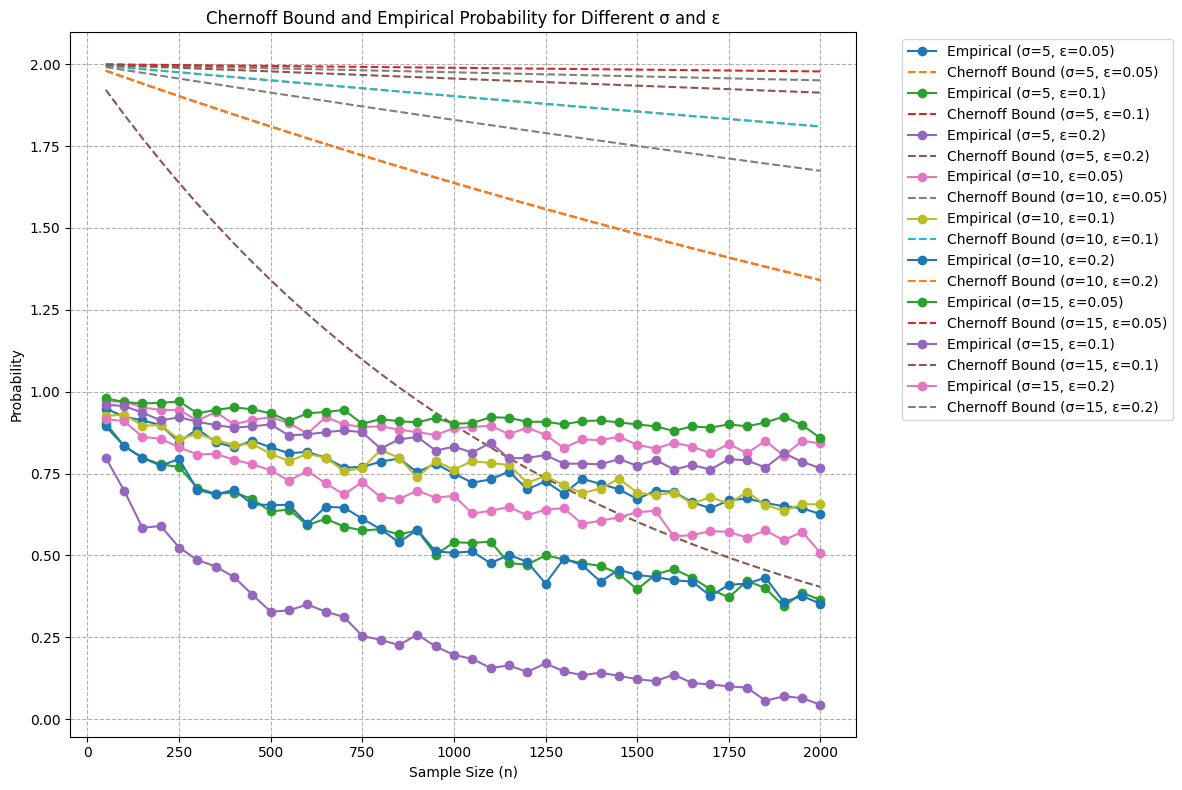

In [19]:
# Define sets of sigma and epsilon values
sigma_values = [5, 10, 15]  # Different values of sigma
epsilon_values = [0.05, 0.1, 0.2]  # Different values of epsilon

# Plot
plt.figure(figsize=(12, 8))

# Loop over sigma and epsilon values
for sigma in sigma_values:
    for epsilon in epsilon_values:
        # Run Monte Carlo simulations
        empirical, chernoff_bound, chebyshev_bound = monte_carlo_joint(sigma, epsilon, n_values, num_experiments)

        # Plot empirical probability and Chernoff bound
        plt.plot(n_values, empirical, marker='o', linestyle='-',
                 label=f'Empirical (σ={sigma}, ε={epsilon})')
        plt.plot(n_values, chernoff_bound, linestyle='--',
                 label=f'Chernoff Bound (σ={sigma}, ε={epsilon})')

# Add labels, title, and legend
plt.xlabel('Sample Size (n)')
plt.ylabel('Probability')
plt.title('Chernoff Bound and Empirical Probability for Different σ and ε')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True, which="both", ls="--")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

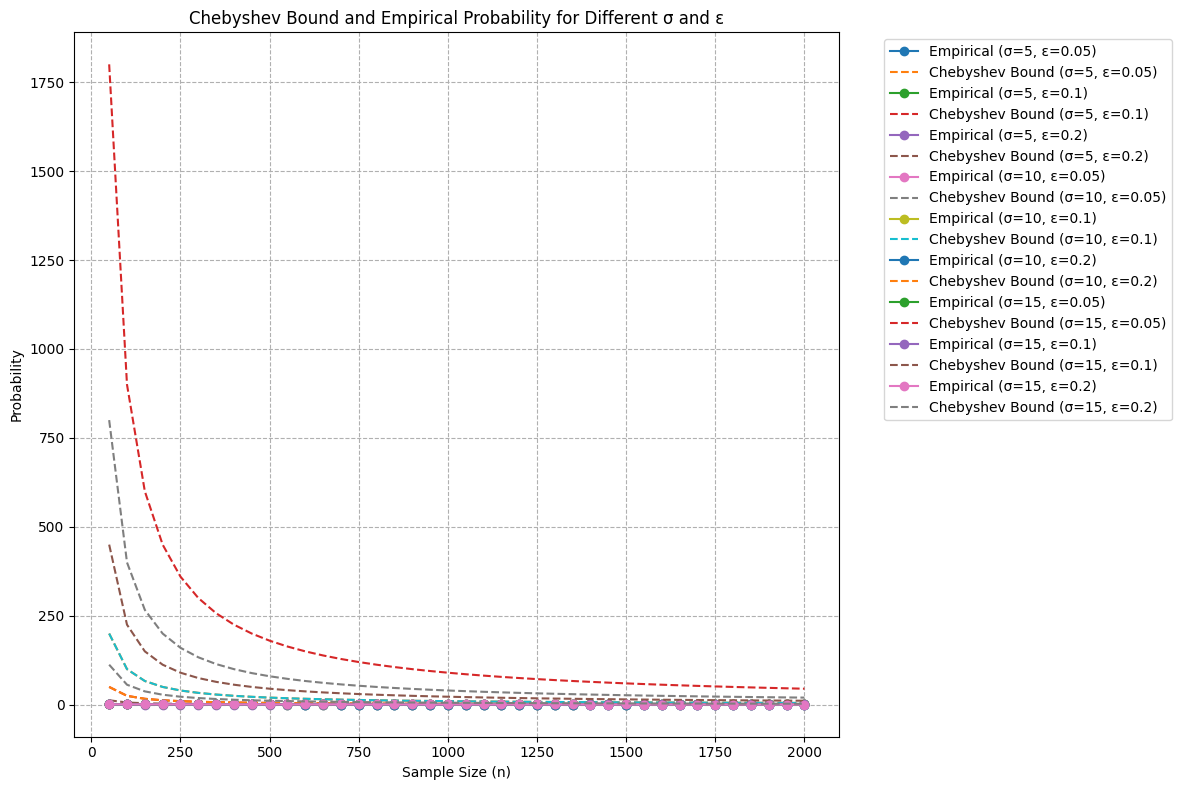

In [20]:
# Define sets of sigma and epsilon values
sigma_values = [5, 10, 15]  # Different values of sigma
epsilon_values = [0.05, 0.1, 0.2]  # Different values of epsilon

# Plot
plt.figure(figsize=(12, 8))

# Loop over sigma and epsilon values
for sigma in sigma_values:
    for epsilon in epsilon_values:
        # Run Monte Carlo simulations
        empirical, chernoff_bound, chebyshev_bound = monte_carlo_joint(sigma, epsilon, n_values, num_experiments)

        # Plot empirical probability and Chernoff bound
        plt.plot(n_values, empirical, marker='o', linestyle='-',
                 label=f'Empirical (σ={sigma}, ε={epsilon})')
        plt.plot(n_values, chebyshev_bound, linestyle='--',
                 label=f'Chebyshev Bound (σ={sigma}, ε={epsilon})')

# Add labels, title, and legend
plt.xlabel('Sample Size (n)')
plt.ylabel('Probability')
plt.title('Chebyshev Bound and Empirical Probability for Different σ and ε')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True, which="both", ls="--")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

###Observations -
* The bounds become tighter as **sigma** decreases or **epsilon** increases.
* The Chernoff bound is generally tighter than the Chebyshev bound, especially for larger values of **n**.
* As **n** increases, both the empirical probability and the bounds decrease, which is expected since the sample mean becomes more concentrated around the true mean (0 in this case).

###4.
To give a 95% guarantee that our confidence interval is correct, i.e.,
P(deviation) < 0.05: How many samples does the Chernoff bound recommend? How many samples does Chebyshev bound recommend? How many samples are
actually needed?

In [23]:
def find_actual_n(sigma, epsilon, num_experiments, threshold=0.05):
    n_values = np.arange(50, 2001, 50)  # n ∈ {50, 100, 150, ..., 2000}
    empirical_prob, _ = monte_carlo_chernoff(sigma, epsilon, n_values, num_experiments)

    # Find the smallest n where empirical_prob < threshold
    for n, prob in zip(n_values, empirical_prob):
        if prob < threshold:
            return n
    return 400  # If no n satisfies the condition

# Find actual n
actual_n = find_actual_n(sigma, epsilon, num_experiments)
print(f"Actual number of samples needed: {actual_n}")

Actual number of samples needed: 400


###Actual
Actual number of samples needed: 400

###Chernoff Bound
$$
\mathbb{P}[|X| \geq \varepsilon] \leq 2\exp\left( \frac{-n \varepsilon^2}{2 \sigma^2} \right)
$$
$$
2\exp\left( \frac{-n \varepsilon^2}{2 \sigma^2} \right) \leq 0.05
$$
$$
n >= 738 \ samples
$$

###Chebyshev Bound
$$
\mathbb{P}[|X| \geq \varepsilon] \leq \left( \frac{σ^2}{n \varepsilon^2} \right)
$$
$$
\left( \frac{σ^2}{n \varepsilon^2} \right) \leq 0.05
$$
$$
n >= 2000 \ samples
$$